<a href="https://colab.research.google.com/github/yurifillippo/datascience/blob/master/Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito

Para uma instituição financeira, avaliar se um cliente cumprirá com suas obrigações financeiras é algo importante e ao mesmo tempo muito dificil.
Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de default.

Default é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não cumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).


<p align=center>
  <img src="https://ddif61068scye.cloudfront.net/cdn/11/images/20150310174527faepce.jpg" height="300px">
</p>

O objetivo é criar um modelo de Machine Learning para informar a probabilidade de um cliente virar inadimplente, obter a maior quantidade de dados sobre seu futuro cliente ajudará na eficácia do modelo, desta forma, a instituição não corre o risco de perder um cliente que será um bom pagador.

# Análise Exploratória

Iremos importar os dados que iremos analisar, você também pode fazer o download [neste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0).

In [0]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar dataset
sns.set_style('dark')

# Importar dataset
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

# Tamanho do dataset
print("Variáveis: {}\nEntradas: {}\n\n".format(df.shape[1], df.shape[0]))

# Primeiras 5 entradas
df.head()

Variáveis: 43
Entradas: 45000




,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Temos um conjunto de dados com 43 variáveis e 45000 entradas.

Olhando para os dados conseguimos identificar que temos entradas criptografadas, e muitos valores Nan, o que nos leva a ter que realizar um trabalho de tratamento no dataset.

Algumas das variáveis como renda do cliente, verificações passadas de crédito, meses do último empréstimo podem ser de extrema valia para chegarmos ao nosso objetivo. 

**Dicionário de Variáveis**

**ids** - ID do cliente

**target_default** - A variável alvo para analisar o risco de default (inadimplência)

**score_1** - Score 1, codificado

**score_2** - Score 2, codificado

**score_3** - Score 3, valor numérico

**score_4** - Score 4, valor numérico

**score_5** - Score 5, valor numérico

**score_6** - Score 6, valor numérico

**risk_rate** - Taxa de risco

**last_amount_borrowed** - Último montante emprestado, valores NaN representam que cliente nunca pegou empréstimo, ou falta de dados

**last_borrowed_in_months** - Meses do ultimo empréstimo

**credit_limit** - Limite de crédito

**reason** - Informações codificadas

**income** - Renda do cliente

**facebook_profile** - Informações se o cliente tem Facebook

**state** - Estado, informação codificada

**zip** - Informações codificadas

**channel** - Informações codificadas

**job_name** - Informações codificadas

**real_state** - Informações codificadas

**ok_since** - Não identificado

**n_bankruptcies** - Não identificado

**n_defaulted_loans** - Quantidade de empréstimos inadimplentes

**n_accounts** - Numero de contas

**n_issues** - Não identificado

**application_time_applied** - Tempo de aplicação

**application_time_in_funnel** - Tempo de aplicação no funil
email - Servidor do e-mail do cliente

**external_data_provider_credit_checks_last_2_year** - Verificações de crédito de provedor de dados externos nos últimos 2 anos

**external_data_provider_credit_checks_last_month** - Verificações de crédito de provedor de dados externo no mês passado

**external_data_provider_credit_checks_last_year** - Verificações de crédito de provedor de dados externos no ano passado

**external_data_provider_email_seen_before** - E-mail do provedor de dados externo visto antes

**external_data_provider_first_name** - Primeiro nome do provedor de dados externo 

**external_data_provider_fraud_score** - Pontuação de fraude do provedor de dados externo

**lat_lon** - Latitude e Longitude

**marketing_channel** - Canal de marketing

**profile_phone_number** - Número de telefone do perfil

**reported_income** - Renda reportada

**shipping_state** - Estado de envio

**shipping_zip_code** - Código postal de envio

**profile_tags** - Tags de perfil  (contém um dicionário com tags atribuídas a cada cliente, aparentemente)

**user_agent** - Agente de usuário

**target_fraud** - Fraude alvo (seria a variável alvo de outro modelo para este mesmo dataset, onde o objetivo seria a detecção de fraude.)

In [0]:
# Resumo estatístico dos dados
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Identificamos nas variáveis abaixo os seguintes problemas:

* *external_data_provider_email_seen_before* - valor negativo de -999
* *reported_income* - valores NaN e inf
* *last_amount_borrowed* - valores outliers
* *credit_limit* - valores outliers
* *ok_since*. - valores outliers

Após identificarmos a quantidade de valores ausentes iniciaremos o tratamento dos dados.

In [0]:
# Verificar valores nulos no dataset
n = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
df_n = pd.DataFrame(n)
df_n.style.format(" {:.2%}")

,0
target_fraud,96.62%
last_amount_borrowed,66.57%
last_borrowed_in_months,66.57%
ok_since,58.99%
external_data_provider_credit_checks_last_2_year,50.28%
external_data_provider_credit_checks_last_year,33.61%
credit_limit,30.67%
n_issues,25.65%
facebook_profile,9.91%
marketing_channel,7.95%


Encontramos 5 variáveis com mais de 50% de suas entradas ausentes:

* target_fraud
* last_amount_borrowed
* last_borrowed_in_months
* ok_since
* external_data_provider_credit_checks_last_2_year

Iremos analisar todas as variáveis para entender qual a sua devia importância e influência sobre o modelo, em alguns casos onde o número de entradas ausentes for alto e não conseguirmos muitas informações sobre a variável, iremos descata-las.

In [0]:
# Tipo das variáveis
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

Ao ver os tipos de entradas conseguimos identificar quais manipulações faremos com cada dado, os numéricos e os objetos.

# Transformação dos dados

Conseguimos identificar algumas variáveis que poderemos excluir por principalmente não conseguir obter mais informações, também trataremos valores Nan e inf identificados nas análises acima.


In [0]:
#Criar cópia do dataset
df_clean = df.copy()

#Transformar valores inf da variável reported_income em NaN
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf,np.nan)

#Excluir variáveis identificadas na análise como sem informação aparente ou que demandam mais pesquisa
df_clean.drop(labels=['ids', 'target_fraud', 'external_data_provider_credit_checks_last_2_year', 'channel', 'reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags','application_time_applied', 'email', 'marketing_channel', 'profile_phone_number', 'shipping_state'], axis=1, inplace=True)

#Alterar valor -999  para Nan da variável external_data_provider_email_seen_before
df_clean.loc[df['external_data_provider_email_seen_before'] == -999.0, 'external_data_provider_email_seen_before'] = np.nan

#Elminar as entradas onde target_default é NaN
df_clean.dropna(subset=['target_default'], inplace=True)


Para as variáveis:

last_amount_borrowed - valores Nan tratarei como 0, pois, se o valor está ausente significa que o cliente não apresenta empréstimos anteriores.

last_borrowed_in_months - informa quantos meses faz que o cliente fez seu ultimo empréstimo, em caso de valores ausentes, também iremos considerar 0.

external_data_provider_credit_checks_last_year - verificações de crédito no ultimo ano, valores Nan, considero como 0.

credit_limit - valores ausentes vou considerar que o cliente nunca teve limite de crédito, ou seja, 0.

In [0]:
#Tratamento das variáveis com valores ausentes

df_clean.last_amount_borrowed.fillna(0, inplace=True)
df_clean.last_borrowed_in_months.fillna(0, inplace=True)
df_clean.external_data_provider_credit_checks_last_year.fillna(0,inplace=True)
df_clean.credit_limit.fillna(0, inplace=True)

Das variáveis restantes, usaremos a Biblioteca Simple Imputer em SimpleImputer para realizar o preenchimento dos valores ausentes, dividindo o dataset entra variáveis numéricas e categóricas:

**Numéricas:** (strategy=mean)


credit_limit

n_issues

external_data_provider_email_seen_before

n_bankruptcies

reported_income

n_defaulted_loans



**Categoricas:** (strategy=most_frequent)


facebook_profile

marketing_channel

job_name

user_agent


In [0]:
# Biblioteca para preenchimento de valores ausentes
from sklearn.impute import SimpleImputer

# Dividir variáveis do dataset entre categoricas e numericas
num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

# Imput de valores em variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:, num_df])

# Imput de valores em variáveis categoricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:, cat_df])

In [0]:
#Verificar valores ausentes no dataset 
print((df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False))

reported_income                                    0.0
external_data_provider_fraud_score                 0.0
score_1                                            0.0
score_2                                            0.0
score_3                                            0.0
score_4                                            0.0
score_5                                            0.0
score_6                                            0.0
risk_rate                                          0.0
last_amount_borrowed                               0.0
last_borrowed_in_months                            0.0
credit_limit                                       0.0
income                                             0.0
facebook_profile                                   0.0
state                                              0.0
real_state                                         0.0
ok_since                                           0.0
n_bankruptcies                                     0.0
n_defaulte

Conforme acima, podemos constatar que não temos mais valores ausentes em nosso dataset, agora teremos que tratar os tipos de entradas para obter um melhor resultado no nosso modelo. 



Irei normalizar os dados de valores numéricos, utilizando StandardScaler, onde o conceito é **Conjunto de dados = (Conjunto de dados - Média) / Desvio Padrão**, desta forma colocarei todos os valores numéricos em uma escala de 0 a 1.

In [0]:
# Importar biblioteca
from sklearn.preprocessing import StandardScaler

# Criar cópia do dataframe
df_2 = df_clean.copy()

# Eliminar coluna target_default e demais variáveis string
num_cols = df_2.drop('target_default', axis=1).select_dtypes(exclude='object').columns

# Passar método StandardScaler
df_2[num_cols] = StandardScaler().fit_transform(df_2[num_cols].values)

Classificaremos as variáveis com seu tipo *object*, com Label Encoding em variáveis do tipo numéricas, como por exemplo, Ruim, Médio, Bom, onde: Ruim = 1, Médio = 2 e Bom = 3.

In [0]:
# Importar biblioteca
from sklearn.preprocessing import LabelEncoder

# Criar cópia do dataframe
encoded_df = df_2.copy()

# Eliminar variáveis numéricas
cat_col = encoded_df.select_dtypes('object').columns

# Passar método LabelEncoder
for col in cat_col:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace=True)

Encerramos a primeira etapa que é de preparar os dados para utilizarmos em um modelo de machine learning, com os dados sem nenhum tipo de preparo, dificilmente extrairíamos informações para chegar ao nosso objetivo.


Iremos nesta segunta etapa dividir o dataset e começar os testes com mais de um modelo de machine learning, buscando também identificar qual mais se adequa ao nosso objetivo.

# Preparação, treinamendo e predição do modelo de Machine Learning 3 - XGBClassifier da biblioteca Xgboost 

Realizaremos o modelo dee Machine Learning utilizando a biblioteca XGBoost.

Pode consultar a documentação [Clicando aqui](https://xgboost.readthedocs.io/en/latest/build.html)

Estudarei um pouco dos parâmetros para obtermos uma melhor performance, e devido a ser uma biblioteca que vem com um alto crescimento entre os Cientistas de Dados, com certeza iremos obter um ótimo resultado.

## Balanceando os dados

Ao analisar a proporsão de resultados False X True na variável alvo *'target_default'* identificamos que temos 5x mais **False**, e iremos balancear os dados diminuindo a quantidade de False do nosso conjunto de dados de treino, a fim de conseguir uma melhor performance no algoritmo.

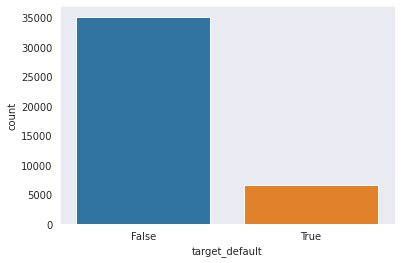

In [0]:
sns.countplot(encoded_df['target_default']);

Nesta etapa dividiremos o dataset onde:

* df_testetrue : Teremos somente os dados onde a variável alvo trás o resultado de True.

* df_testefalse : Teremos somente os dados onde a variável alvo trás o resultado de False.


In [0]:
#Criar cópia dos datasets

#Cópia para Target Default = True
df_testetrue = encoded_df.copy()

#Cópia para Target Default = False
df_testefalse = encoded_df.copy()

In [0]:
#Dividir dataset para Target Default = True 
df_testetrue = df_testetrue.loc[df_testetrue['target_default'] == True]
#Dividir dataset para Target Default = False
df_testefalse = df_testefalse.loc[df_testefalse['target_default'] == False]

In [0]:
#Contagem de valores True no dataset
print("Contagem de entradas True: {}".format((df_testetrue['target_default'].value_counts())));
#Contagem de valores False no dataset
print("Contagem de entradas False: {}".format(df_testefalse['target_default'].value_counts()));

Contagem de entradas True: True    6661
Name: target_default, dtype: int64
Contagem de entradas False: False    35080
Name: target_default, dtype: int64


Confirmando o gráfico acima sobre a divisão do dataset, temos 6661 entradas True e 35080 do tipo False.

Iremos diminuir a quantidade do tipo False para 20000 e manteremos todas do tipo True.

In [0]:
#Escolhendo aleatóriamente entradas False
df_testefalse = df_testefalse.sample(20000)

#Agrupando o Datagrame df_testetrue e df_testefalse
new_df = pd.concat([df_testefalse, df_testetrue])

print('Entradas no dataset: {}'.format(new_df.shape[0]))

Entradas no dataset: 26661


Após diminuirmos as entradas, agrupamos novamente o dataset, que agora possui 26661 entradas, com uma proporção de 3X False para cada True.

Em casos de baixa performance do algoritmos iremos ajustar esta quantidade podendo até, igualar a quantidade de entradas de True e False, ou até mesmo utilizar a técnica de Over Sample, criando entradas do tipo True para igualarmos a quantidade de False na variável alvo.

## Dividindo dataset entre dados de treino e dados de teste

Após todo processo de balanceamento dos dados, o dataset será dividido entre dados de treino e dados de teste, utilizando *train_test_split* da biblioteca **Sklearn**.

* Utilizaremos o padrão de 25% dos dados para treino e 75% para teste:

In [0]:
# Importar biblioteca
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = new_df.drop('target_default', axis=1)
y = new_df.target_default 

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

Nossos dados de treino terão a seguinte proporção:

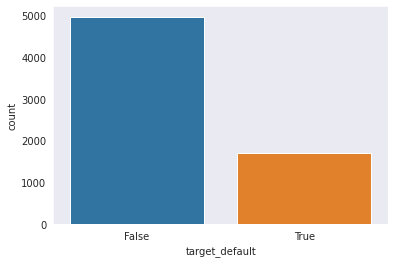

In [0]:
sns.countplot(y_test);

## Treinando modelo de machine learning

Iniciaremos o treinamento e predição com nosso modelo de Classificação XGBClassifier.



In [0]:
#Importanto bibliotecas necessárias para criarmos o modelo de Machine Learning
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [0]:
# instanciando o modelo e treinando o mesmo
ml_boost1 = XGBClassifier(learning_rate=0.01, n_estimators=1100, max_depth=19, subsample = 0.9, colsample_bytree = 0.1, gamma=1, random_state=42, scale_pos_weight=2,validate_parameters=True)

ml_boost1.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=19,
              min_child_weight=1, missing=None, n_estimators=1100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=None,
              silent=None, subsample=0.9, validate_parameters=True,
              verbosity=1)

In [0]:
y_pred_boost = ml_boost1.predict(X_test)

In [0]:
# ver performance do algoritmo
print("\nClassification_report:")
print(classification_report(y_test, y_pred_boost))


Classification_report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      4967
        True       1.00      0.96      0.97      1699

    accuracy                           0.99      6666
   macro avg       0.99      0.98      0.98      6666
weighted avg       0.99      0.99      0.99      6666



Conseguimos uma performance de 99%, onde não iremos alterar novamente os parâmetros par evitar um overfitting.

A Precisão tanto para True como para False temos 99%.

# Conclusão

Inicialmente encontramos um conjunto de dados sem muitas informações e variáveis criptografadas, o que sem informações direto da empresa seria impossível descobrir do que se tratavam.

Analisei cuidadosamente cada variável para buscar identificar quais poderiam ser descartadas e quais eram fundamentais para nosso modelo de Machine Learning.

Após a identificação também tratamos as variáveis que apresentavam valores ausentes e que não poderiam ser descartadas.

No modelo de Machine Learning utilizando a biblioteca XGBoost:

Tive problemas para utilizar os dados balanceados da forma que a biblioteca imblearn.under_sampling me trouxe os dados, então utilizando python e pandas dividi o conjunto de dados entre True e False, desta forma podia controlar a quantidade de entradas False iria incluir e analisar a performance.

Após a criação do modelo de Machine Learning, fui ajustando a quantidade de entradas False no conjunto de dados, onde buscava tanto performance como acurácia em 99%:

In [0]:
df_result = {
    'Entradas False' : [6661, 15000, 20000],
    'Performance Geral' : [0.93,0.99,0.99],
    'Precisão para True' : [0.87,0.99,0.99],
    'Precisão para False' : [1,1,0.99],
}

df_result = pd.DataFrame(df_result)

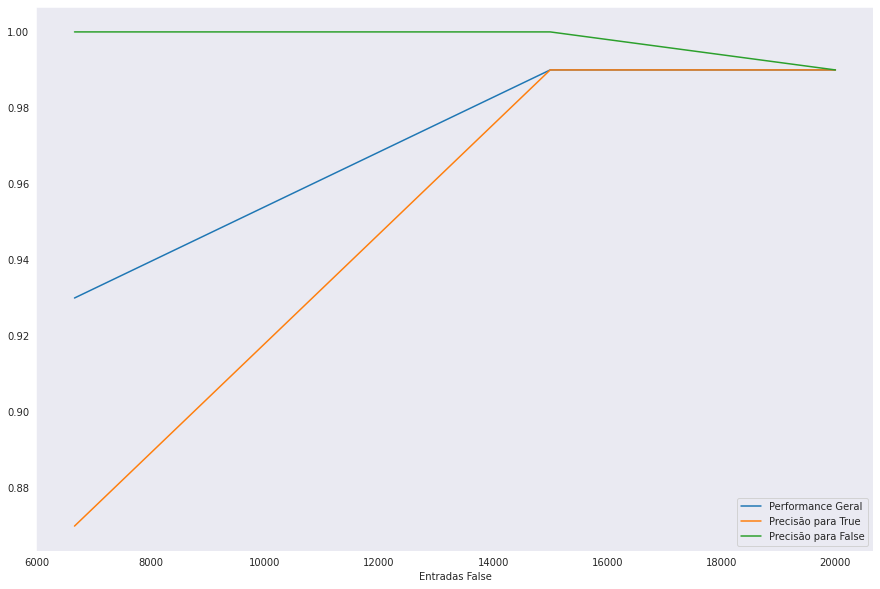

In [0]:
#Plotar figure
fig, ax = plt.subplots(figsize=(15,10))

#Plotar gráfico
df_result.plot('Entradas False', ax=ax);

Para obter a performance + acurácia em 99% utilizei a quantidade de 20000 entradas False no conjunto de dados, desta forma tenho um modelo bem ajustado e sem overfitting.